For this script, we used the wider set of EF measures. so we could use feature selection etc. 
This was in "MB_EF_Detail_Reduced_Dec21" at first. Let's use this again.

In [77]:
from numpy import absolute, mean, std
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import os  

import random

random.seed(10)

# https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [42]:
print(random.random())

0.5714025946899135


In [79]:
#work_p = "C:/Users/claire.smid/Documents/Main_STUDY/Model-based_learning_mainstudy/"

work_p = "C:/Users/claire.smid/Documents/DCP/Writing/Thesis/Chapter2/"

# Including all decision making, EFs and mental health:
#dataset = pd.read_csv(work_p+"All_DMs_EFs_MHs_Nov21.csv", sep=',') 

# Including all decision making and EFs
#dataset = pd.read_csv(work_p+"All_DMs_EFs_Nov21.csv", sep=',') 

# Including EFs and MB only
#dataset = pd.read_csv(work_p+"MB_EFs_Only_Nov21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MB_EF_Detail_Imputed_Dec21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MB_EF_Detail_Imputed_REDUCED_Dec21.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MBMF_EF_Detail_Imp_6Jun2022.csv", sep=',') 
#dataset = pd.read_csv(work_p+"MBMF_EF_Detail_Imp_9Jun2022.csv", sep=',') 
dataset = pd.read_csv(work_p+"MBMF_EF_Detail_Imp_14Jun2022.csv", sep=',') 
pd.options.display.max_columns = 100

dataset

,ID,Session,School,Gender,Age_Frac_Imp,SES_inv_z,Avg_Pts,Avg_Pts_lo,Avg_Pts_hi,w_P6,w_diff,it_P6,lr_P6,eg_P6,st_P6,repst_P6,it,lr,eg,st,repst,T_Vocab,T_Matrix,Corsi_WM_Span,CogFlex_t,SSRT,FlankerSwitch_t,FlankerInhib_t,Stroop_t,dprimeONEBACK_t0,dprimeTWOBACK_t0,AY_Inv_eff_score,BX_Inv_eff_score,CF_Mix_IES_Diff,SSRT_SSD_z
0,1,0,Trevor Roberts School,M,12.444444,0.226732,0.013173,-0.002222,0.029551,0.425788,0.121567,0.619787,0.437227,0.419932,-0.177439,-0.709067,0.625122,0.442486,0.420558,-0.177359,-0.704026,62,66,7,0.524022,-0.798678,0.035289,-0.303618,-0.818045,0.958333,0.851190,0.560083,1.078656,-0.317126,0.316186
1,4,0,Trevor Roberts School,F,11.838889,-0.587075,0.024752,0.004831,0.041414,0.528114,-0.142475,0.804932,0.698279,0.486952,-0.435025,-0.862134,0.812849,0.685928,0.486859,-0.426516,-0.851632,55,50,5,1.152471,0.028908,0.242714,0.563637,-0.013837,0.958333,0.880952,1.014859,0.713503,-0.007000,-0.640517
2,5,0,Trevor Roberts School,M,7.611111,1.040539,0.043889,0.037037,0.052972,0.770192,0.132597,0.880334,0.755154,0.530449,-0.589862,-0.083494,0.846292,0.747178,0.556262,-0.601976,-0.080824,66,55,4,-1.093324,-0.380691,0.525759,-0.140001,-0.205424,0.607143,-0.023810,1.009100,2.680493,-0.377855,0.987913
3,8,0,Trevor Roberts School,M,6.747222,0.226732,0.013740,-0.022676,0.054293,0.582383,0.028154,0.651551,0.764537,0.577141,0.588800,0.396509,0.652178,0.783163,0.582775,0.589636,0.395179,64,61,4,0.458539,-1.489266,-0.041334,-0.248403,1.083356,0.630952,-0.166667,1.776796,2.286356,-0.003408,-0.071924
4,15,0,Trevor Roberts School,M,10.600000,0.226732,-0.014891,0.016414,-0.040881,0.448529,-0.036160,0.553742,0.489282,0.530107,-0.303803,-1.629661,0.553467,0.487266,0.528799,-0.305209,-1.630474,55,62,6,-0.133400,0.016327,-0.679340,-0.246747,0.085989,0.833333,0.833333,2.167615,1.790722,0.068897,-1.590435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,193,0,Broadfields,M,10.486111,-2.214688,0.098073,0.071605,0.120545,0.422117,0.117357,0.433004,0.519166,0.491737,0.173996,-0.269121,0.436899,0.517092,0.471755,0.175653,-0.262585,41,56,6,0.329597,0.200856,-0.572747,0.212403,0.187235,-0.083333,0.023810,0.629227,0.402836,0.016885,1.374665
65,195,0,Merton Court,M,10.372222,-0.587075,-0.017052,-0.065302,0.045455,0.610913,-0.218845,0.445750,0.349609,0.394229,-0.074491,-0.851411,0.453946,0.367773,0.398445,-0.070527,-0.840291,58,64,6,0.680336,-0.707812,-0.136637,0.689489,-0.980713,0.958333,0.714286,1.094336,0.913792,-0.342356,-1.236251
66,196,0,Orley Farm,M,8.608333,0.498001,0.057756,0.049645,0.064815,0.718295,0.107204,1.381509,0.868366,0.658000,0.382585,-0.281852,1.387507,0.884099,0.678044,0.386831,-0.277990,64,52,5,-0.330512,0.909617,0.208257,-0.148340,-0.622866,0.630952,0.797619,0.964536,3.303898,-0.710446,0.139772
67,202,0,Newland House,F,11.236111,1.040539,0.044004,0.045351,0.042735,0.893768,0.043038,1.296684,0.839617,0.514458,0.758670,-0.065990,1.165809,0.808938,0.521772,0.873589,-0.060433,63,54,7,0.458539,-0.562425,-0.814565,0.551108,-0.565334,0.880952,0.464286,1.221067,1.221168,0.005142,-1.571437


In [80]:
os.chdir("C:/Users/claire.smid/Documents/DCP/Writing/Thesis/Chapter2/")
os.getcwd()

'C:\\Users\\claire.smid\\Documents\\DCP\\Writing\\Thesis\\Chapter2'

In [81]:
# one hot encoding
dataset.Gender.replace(to_replace=['M','F'],value=[1,0],inplace=True)

In [82]:
# from column 8 onwards no more model parameters, or maybe just include all?
# now including only the EFs for the first approach, and splitting factors for the later approach
#X = dataset.iloc[:, np.r_[4:5,10:len(dataset.columns)]]

# # 6 jun dataset
# X = dataset.iloc[:, np.r_[14:34]]
# X_cols = X
# y = dataset.iloc[:,8]

# 7 jun dataset
X = dataset.iloc[:, np.r_[21:35]]
X_cols = X
y = dataset.iloc[:,10]

In [83]:
#y = y.reshape(len(y),1)

In [84]:
X

,T_Vocab,T_Matrix,Corsi_WM_Span,CogFlex_t,SSRT,FlankerSwitch_t,FlankerInhib_t,Stroop_t,dprimeONEBACK_t0,dprimeTWOBACK_t0,AY_Inv_eff_score,BX_Inv_eff_score,CF_Mix_IES_Diff,SSRT_SSD_z
0,62,66,7,0.524022,-0.798678,0.035289,-0.303618,-0.818045,0.958333,0.851190,0.560083,1.078656,-0.317126,0.316186
1,55,50,5,1.152471,0.028908,0.242714,0.563637,-0.013837,0.958333,0.880952,1.014859,0.713503,-0.007000,-0.640517
2,66,55,4,-1.093324,-0.380691,0.525759,-0.140001,-0.205424,0.607143,-0.023810,1.009100,2.680493,-0.377855,0.987913
3,64,61,4,0.458539,-1.489266,-0.041334,-0.248403,1.083356,0.630952,-0.166667,1.776796,2.286356,-0.003408,-0.071924
4,55,62,6,-0.133400,0.016327,-0.679340,-0.246747,0.085989,0.833333,0.833333,2.167615,1.790722,0.068897,-1.590435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,41,56,6,0.329597,0.200856,-0.572747,0.212403,0.187235,-0.083333,0.023810,0.629227,0.402836,0.016885,1.374665
65,58,64,6,0.680336,-0.707812,-0.136637,0.689489,-0.980713,0.958333,0.714286,1.094336,0.913792,-0.342356,-1.236251
66,64,52,5,-0.330512,0.909617,0.208257,-0.148340,-0.622866,0.630952,0.797619,0.964536,3.303898,-0.710446,0.139772
67,63,54,7,0.458539,-0.562425,-0.814565,0.551108,-0.565334,0.880952,0.464286,1.221067,1.221168,0.005142,-1.571437


In [85]:
#X['SSRT_SSD_z'] = X['SSRT_SSD_z']*-1

In [86]:
y

0     0.121567
1    -0.142475
2     0.132597
3     0.028154
4    -0.036160
        ...   
64    0.117357
65   -0.218845
66    0.107204
67    0.043038
68    0.307179
Name: w_diff, Length: 69, dtype: float64

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

In [88]:
X

array([[ 3.92986510e-01,  1.04805356e+00,  1.86614836e+00,
         8.23574689e-01, -7.81869423e-01,  5.14227132e-02,
        -7.91541408e-01, -1.14774038e+00,  6.10112522e-01,
         1.22443140e+00, -1.02573375e+00, -5.17512920e-01,
        -5.86473127e-01,  3.26870645e-01],
       [-2.27315726e-01, -4.74382139e-01, -4.33213013e-01,
         2.10259875e+00,  1.12205581e-01,  4.10626096e-01,
         8.80136899e-01,  8.30817957e-02,  6.10112522e-01,
         1.32190020e+00, -5.92275389e-01, -7.27249849e-01,
         2.77194477e-01, -6.33199335e-01],
       [ 7.47444930e-01,  1.37901785e-03, -1.58289370e+00,
        -2.46805900e+00, -3.30301201e-01,  9.00782032e-01,
        -4.76162864e-01, -2.10138461e-01, -1.01752061e+00,
        -1.64114498e+00, -5.97764683e-01,  4.02551810e-01,
        -7.55595816e-01,  1.00096233e+00],
       [ 5.70215720e-01,  5.72292406e-01, -1.58289370e+00,
         6.90302678e-01, -1.52793872e+00, -8.12659299e-02,
        -6.85112426e-01,  1.76230932e+00, -9.

## LOOCV with all features

In [89]:
# find number of samples
n = X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))


MSE: -0.043 (0.064)


## Find the best predictors using RFE

In [90]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE

# create pipeline
rfe = RFECV(estimator=SVR(kernel = 'linear'),min_features_to_select=2)
model = SVR(kernel = 'linear')
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# find number of samples
n = X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# evaluate model
#rfe.fit(X,y)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=n)
# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

MSE: -0.039 (0.062)


### Predicting the best results

In [91]:
# find out which predictors
rfe.fit(X,y)

data_top = X_cols.columns
# summarise all features
for i in range(X.shape[1]):
    print('Selected %s,\t Rank: %.1f, \tName: %s' % (rfe.support_[i], rfe.ranking_[i],data_top[i]))

Selected True,	 Rank: 1.0, 	Name: T_Vocab
Selected False,	 Rank: 4.0, 	Name: T_Matrix
Selected False,	 Rank: 5.0, 	Name: Corsi_WM_Span
Selected False,	 Rank: 10.0, 	Name: CogFlex_t
Selected False,	 Rank: 11.0, 	Name: SSRT
Selected False,	 Rank: 2.0, 	Name: FlankerSwitch_t
Selected True,	 Rank: 1.0, 	Name: FlankerInhib_t
Selected True,	 Rank: 1.0, 	Name: Stroop_t
Selected False,	 Rank: 7.0, 	Name: dprimeONEBACK_t0
Selected False,	 Rank: 6.0, 	Name: dprimeTWOBACK_t0
Selected False,	 Rank: 8.0, 	Name: AY_Inv_eff_score
Selected False,	 Rank: 12.0, 	Name: BX_Inv_eff_score
Selected False,	 Rank: 3.0, 	Name: CF_Mix_IES_Diff
Selected False,	 Rank: 9.0, 	Name: SSRT_SSD_z


## Use permutation testing to find the best predictors

In [92]:
from sklearn.model_selection import RepeatedKFold
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights, explain_weights

Xfeature_names = X_cols.columns

# create pipeline
regressor = SVR(kernel = 'rbf')

cv = RepeatedKFold(n_splits=6, n_repeats=100, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(X,y)

show_weights(perm, feature_names = X_cols.columns.tolist())
#explain_weights(perm, feature_names = X.columns.tolist())
#show_prediction(perm, X.iloc[4], feature_names = X.columns.tolist())

C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Weight,Feature
0.1543 ± 0.5425,FlankerInhib_t
0.1390 ± 0.4667,Stroop_t
0.0512 ± 0.3807,SSRT_SSD_z
0.0478 ± 0.2653,dprimeTWOBACK_t0
0.0318 ± 0.3323,FlankerSwitch_t
0.0295 ± 0.2809,CogFlex_t
0.0144 ± 0.2389,dprimeONEBACK_t0
0.0132 ± 0.2523,SSRT
-0.0065 ± 0.1575,T_Vocab
-0.0077 ± 0.1345,AY_Inv_eff_score


[-0.00645255 -0.02552878 -0.02353879  0.02946203  0.01320793  0.03182114
  0.15428623  0.13900219  0.01444998  0.04777883 -0.00768619 -0.01337976
 -0.02737885  0.05121387]
Feature: 0, Score: 0.15429
Feature: 1, Score: 0.13900
Feature: 2, Score: 0.05121
Feature: 3, Score: 0.04778
Feature: 4, Score: 0.03182
Feature: 5, Score: 0.02946
Feature: 6, Score: 0.01445
Feature: 7, Score: 0.01321
Feature: 8, Score: -0.00645
Feature: 9, Score: -0.00769
Feature: 10, Score: -0.01338
Feature: 11, Score: -0.02354
Feature: 12, Score: -0.02553
Feature: 13, Score: -0.02738


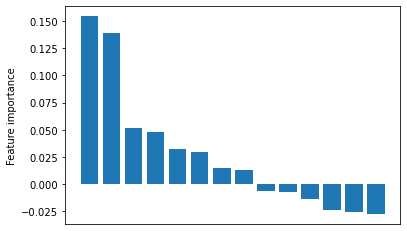

In [105]:
importance = perm.feature_importances_
names = X_cols.columns.tolist()
#print(importance)
print(importance)
f_sorted = sorted(importance, reverse = True)

# summarize feature importance
for i,v in enumerate(f_sorted):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(f_sorted))], f_sorted)
plt.ylabel("Feature importance")
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.show()

Feature: 0, Score: 0.07796
Feature: 1, Score: 0.06074
Feature: 2, Score: 0.07496
Feature: 3, Score: 0.15183
Feature: 4, Score: 0.14634
Feature: 5, Score: 0.12535
Feature: 6, Score: 0.25548
Feature: 7, Score: 0.19084
Feature: 8, Score: 0.04963
Feature: 9, Score: 0.10259
Feature: 10, Score: 0.04467
Feature: 11, Score: 0.05160
Feature: 12, Score: 0.04188
Feature: 13, Score: 0.19839


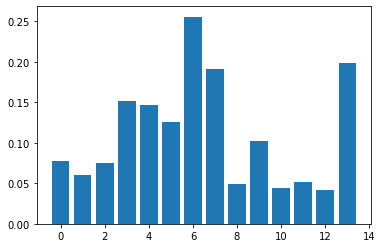

In [93]:
from sklearn.inspection import permutation_importance

# create pipeline
regressor = SVR(kernel = 'rbf')

regressor.fit(X,y)

results = permutation_importance(regressor, X, y)
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Hyperparameter tuning

In [57]:
regressor.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for metacontrol
X = dataset[["Stroop_t","FlankerInhib_t"]]
X_cols = X
X = scaler.fit_transform(X)

# find number of samples
n = X.shape[0]

# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR()
# define search space
parameters = {'kernel': ['linear','rbf'], 'C':[0.1, 0.5, 1, 1.5, 2, 5, 10, 20],
              'gamma': [1e-7, 1e-4, 1e3, 0.01, 0.1, 0.2],'epsilon':[0.1,0.2,0.5,0.3],
             'max_iter': [-1]}

search = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=cv, n_jobs = -1)

# random search:
#search = RandomizedSearchCV(regressor, parameters, n_iter=1000, 
                            #scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X,y)

# summarize result
print('Best MSE Score: %s' % result.best_score_)
print('Best Hyperparameters %s' % result.best_params_ )


Best MSE Score: -0.029412974676457725
Best Hyperparameters {'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1}


## K-fold cross validation with tuned model and best predictors

In [65]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold

# make the model manually with the predictors
#X = dataset[["flankerinh_t0"]]
#X = dataset[["flankerinh_t0","stroop_t0"]]
#X = dataset[["flankerinh_t0","flankerswitch_t0","dprimeONEBACK_t0","dprimeTWOBACK_t0",
           # "AXCPT_CorrRT_Shift_Index","AY_RCS","BX_RCS","Stroop_InCon_IES_Diff",
           # "SSRT_mean_ssd","CF_Mix_IES_Diff"]]

# create pipeline
#regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.2)
#regressor = SVR(kernel = 'linear', C = 1, epsilon = 0.5, gamma = 1e-07)
#regressor = SVR(kernel = 'rbf', C = 0.5, epsilon = 0.1, gamma = 0.1, max_iter=-1)

regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.01, max_iter=-1)
#regressor = SVR(kernel = 'sigmoid', C = 5, epsilon = 0.1, gamma = 0.2, max_iter=-1)
# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=100, random_state=1)
n_scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.030 (0.013)
r2: 0.062 (0.327)
exp var: 0.155


## new results:
### rbf kernel (three predictors: flanker (2) and stroop) (7 jun data)
- MSE: -0.030
- r2: -0.144
- exp var: -0.038

### rbf kernel (two predictors: flanker and stroop) (7 jun data)
- MSE: -0.030
- r2: 0.062
- exp var: 0.155

### rbf kernel (two predictors: flanker and stroop)
- MSE = -0.032
- r2 = 0.046
- exp var: 0.130

## old results:

### linear kernel 
- MSE: -0.034
- r2 = 0.022
- exp var= 0.152

### rbf kernel (two predictors: flanker and stroop)
- MSE = -0.031
- r2 = 0.104
- exp var = 0.203

### rbf kernel (one predictor: flanker)
- MSE = -0.034
- r2 = 0.016
- exp var = 0.157

In [68]:
#X = dataset[["flankerinh_t0","stroop_t0"]]
Xfeature_names = X_cols.columns

# create pipeline
regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.01, max_iter=-1)

cv = RepeatedKFold(n_splits=6, n_repeats=100, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(X,y)

show_weights(perm, feature_names = X_cols.columns.tolist())


C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: show_prediction() missing 1 required positional argument: 'doc'

In [71]:
importance = perm.feature_importances_
importance
perm.

AttributeError: 'SVR' object has no attribute 'predict_proba'

## Repeat with PCA

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)

# from column 8 onwards no more model parameters, or maybe just include all?
# now including only the EFs for the first approach, and splitting factors for the later approach
X = dataset.iloc[:, np.r_[14:34]]
X_cols = X
y = dataset.iloc[:,8]

pca.fit(X)
pc_X = pca.transform(X)

# find number of sam`aples
n = pc_X.shape[0]
# create loocv procedure
cv = LeaveOneOut()
# create model
regressor = SVR(kernel = 'rbf')
# evaluate model
scores = cross_val_score(regressor, pc_X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# report performance
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
principalDF = pd.DataFrame(data = pc_X)
principalDF

,0
0,-506.436158
1,-869.730993
2,548.839333
3,829.517722
4,-180.606737
...,...
64,-773.641050
65,-770.911363
66,-643.700990
67,-449.336181


## Then run rfe again

In [40]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold

# create pipeline
rfe = RFECV(estimator=SVR(kernel = 'rbf'),min_features_to_select=1)
model = SVR(kernel = 'rbf')
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, pc_X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, pc_X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, pc_X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.041 (0.018)
r2: -0.220 (0.254)
exp var: -0.102


In [41]:
# # find out which predictors
# rfe.fit(pc_X,y)
# data_top=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
# # data_top = ['MemSpeed_negBXRCS','posBXRCS_MemSpeed','PBI_InConIES',
# #                                                    'negSwitchIES_negPBI','DP2_negCFSwitchIES',
# #                                                    'negCFSwitchIES_InconIES','negInConIES_AYRCS']
# # summarise all features
# for i in range(pc_X.shape[1]):
#     print('row: %d, Selected %s,\t Rank: %.1f, \tName: %s' % (i, rfe.support_[i], rfe.ranking_[i],data_top[i]))

## Then run permutation testing again

In [43]:
from sklearn.model_selection import RepeatedKFold
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights

#data_top=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
data_top=['PC1']
Xfeature_names = data_top

# create pipeline
regressor = SVR(kernel = 'rbf')

cv = RepeatedKFold(n_splits=6, n_repeats=10, random_state=1)
perm = PermutationImportance(regressor, cv = cv)
perm.fit(pc_X,y)

show_weights(perm, feature_names = Xfeature_names)
#show_prediction(perm, X.iloc[4], feature_names = X.columns.tolist())

C:\Users\claire.smid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Weight,Feature
-0.0181 ± 0.5289,PC1


## Hyper parameter testing

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# if only one variable
#var = pc_X[:,5]
var = pc_X
X = var.reshape(len(var),1)

# if more than 1
#X = pc_X[:,[5,9]]

# find number of samples
n = X.shape[0]

# create loocv procedure
cv = LeaveOneOut()
# create model
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
# define search space
#space = dict()
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
#space['alpha'] =  [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
#space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
parameters = {'kernel': ['linear','rbf'], 'C':[1.5, 10],'gamma': [1e-7, 1e-4, 1e-3, 0.01, 0.1, 0.2],'epsilon':[0.1,0.2,0.5,0.3]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#space['parameters'] = {'kernel':('linear','rbf'), 'C':[1.5]}
# define search
search = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error',cv=cv, n_jobs = -1)
# execute search
result = search.fit(X,y)

# evaluate model
#scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=n)
# force positive
#scores = absolute(scores)

# summarize result
print('Best MSE Score: %s' % result.best_score_)
print('Best Hyperparameters %s' % result.best_params_ )


## Then use k-fold cross validation again to test final model

In [30]:
# explore the algorithm wrapped by RFE
# automatically select the number of features for RFE
from sklearn.model_selection import RepeatedKFold


# create pipeline
regressor = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, gamma = 0.0001)
#regressor = SVR(kernel = 'linear', C = 1, epsilon = 0.5, gamma = 1e-07)
# evaluate model
cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
r2_scores = cross_val_score(regressor, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
explained_var = cross_val_score(regressor, X, y, scoring='explained_variance', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('r2: %.3f (%.3f)' % (mean(r2_scores), std(r2_scores)))
print('exp var: %.3f' % mean(explained_var))


MSE: -0.039 (0.016)
r2: -0.113 (0.143)
exp var: 0.015


### for one predictor (PC4)
- MSE -0.039
- r2 -0.113
- exp var 0.015

### for two predictor (PC4 and 8)
- MSE -0.040
- r2 = -0.126
- exp var = 0.004